<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/RedesConvulosionales/Clasificacion_MNIST_RedesConvolucionales_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clasificación de dígitos usando Redes Convolucionales y Keras**
**1 - El set de datos**

En este tutorial implementaremos una red convolucional capaz de clasificar los dígitos del 0 al 9. Para ello usaremos el set de datos [MNIST](http://yann.lecun.com/exdb/mnist/1), que contiene un total de 70.000 imágenes escritas a mano por diferentes personas.

Al final de este tutorial tendremos claro:

Cómo funciona LeNet-5, la red convolucional usada en este tutorial
Cómo implementar esta red convolucional usando la librería Keras
Cómo evaluar el desempeño de la red
En primer lugar, veamos cómo es [LeNet-5](http://yann.lecun.com/exdb/lenet/).
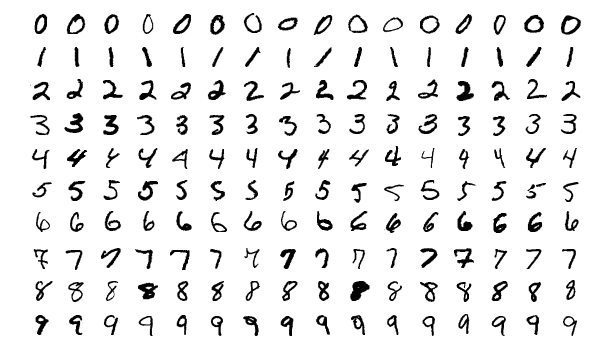


**2 - LeNet-5**

Esta red es la precursora de todas las redes convolucionales usadas en la actualidad. Fue diseñada por [Yann LeCun] a finales de los años 90, con el fin de clasificar dígitos (del 0 al 9) escritos a mano.

Esta red tiene como entradas imágenes de 28x28x1: 28 filas, 28 columnas y 1 sólo plano de color, es decir imágenes en escala de gris.

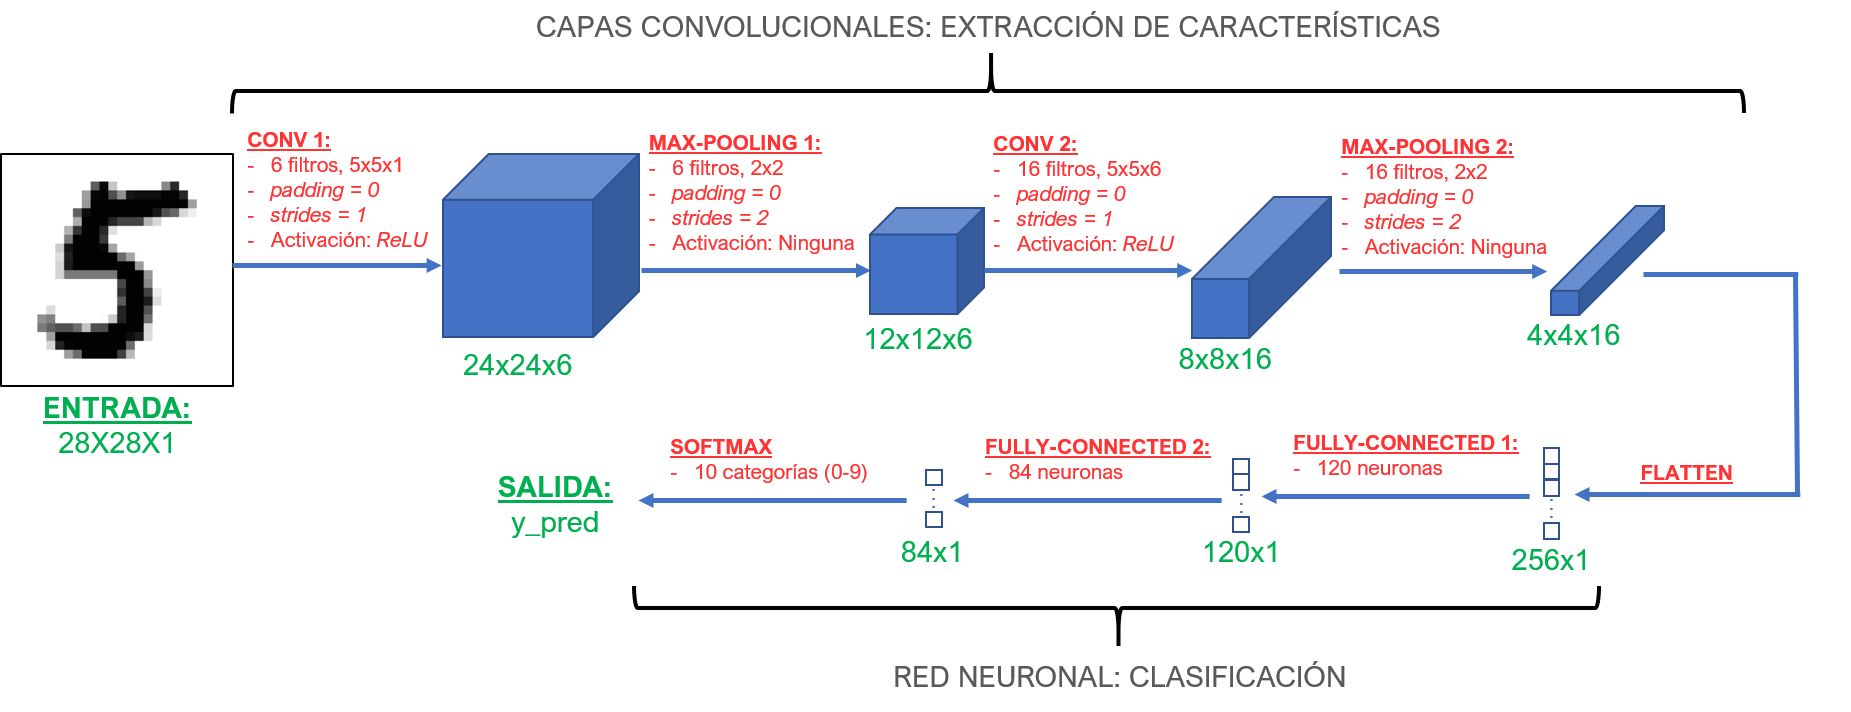


Como se observa en la figura de arriba, la red cuenta con dos bloques de procesamiento:

Las capas convolucionales que se encargan de extraer características de las imágenes
La red neuronal, que toma dichas características y permite clasificar la imagen en uno de los posibles 10 dígitos (del 0 al 9)
Además, podemos observar las siguientes características:

Después de realizar convoluciones se usa siempre la función de activación ReLU
El max-pooling se realiza después de las convoluciones
Las dimensiones espaciales (número de filas y columnas) de las imágenes se reducen entre una capa y otra, mientras que la profundidad (correspondiente a las características extraídas) aumenta entre una capa y otra
Las redes convolucionales usadas en la actualidad implementan una lógica similar a la de LeNet-5.


**3 - Implementación en Keras**

3.1 - Librerías requeridas

En primer lugar se importa la librería Numpy y se ajusta la semilla del generador aleatorio para garantizar la reproducibilidad del entrenamiento. También importaremos la librería Matplotlib, para poder visualizar las imágenes del set de datos :

In [1]:
import numpy as np
np.random.seed(2)

import matplotlib.pyplot as plt
%matplotlib notebook

A continuación importamos las funciones Sequential, Conv2D, MaxPooling2D, Flatten, Dense y SGD de Keras:

In [2]:
from keras.datasets import mnist
#NP_UTILS : permite representar cada una de las etiquetas de imagenes en el formato one-hot, requerido por keras en el entrenamiento y la validadcion de la red convulocional.
from keras.utils import np_utils

from keras.models import Sequential #Para crear el contenedor del modelo
from keras.layers.convolutional import Conv2D, MaxPooling2D #Para implemnetar las capas convolucionales
from keras.layers.core import Flatten, Dense #Para implementar la red neuronal
from keras.optimizers import SGD #para usar el metodo del gradiente descendente

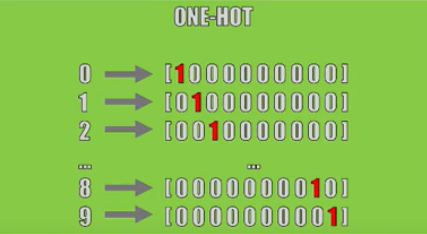

**3.2 - Pre-procesamiento del set de datos**

La función mnist de Keras permite leer el set de datos y crear automáticamente los sets de entrenamiento y validación. El primero de ellos tendrá 60,000 imágenes (cada una de 28x28) con sus correspondientes categorías, mientras que el segundo tendrá 10,000 datos:

In [3]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Los pixeles en las imágenes (tanto de entrenamiento como de validación) tienen valores entre 0 y 255; sin embargo, para garantizar la convergencia del entrenamiento es necesario normalizar estos valores entre 0 y 1:

In [4]:

x_train = x_train/255.0
x_test = x_test/255.0

También se deben codificar y_train y y_test en el formato one-hot:

In [5]:
nclases = 10 #Numero de clases (0,1,2,3 ... 10)
y_train = np_utils.to_categorical(y_train,nclases)
y_test = np_utils.to_categorical(y_test,nclases)

Finalmente, podemos visualizar un ejemplo de imagen dentro del dataset:

(-0.5, 27.5, 27.5, -0.5)

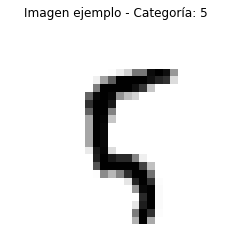

In [6]:
nimagen = 100 #Num de imagen en el dataset 
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r') #Reshape a imagen de 28 x 28 pixeles
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')

Por defecto, Keras requiere cada dato de entrada en el formato nimagenes x nfilas x ncolumnas x ncanales, donde ncanales = 1 por ser imágenes en escala de gris. Se debe modificar el tamaño de x_train y x_test para cumplir con este requerimiento:

In [7]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)



**3.3 - Creación del modelo**

En la siguiente tabla se resumen las características de cada capa a implementar:

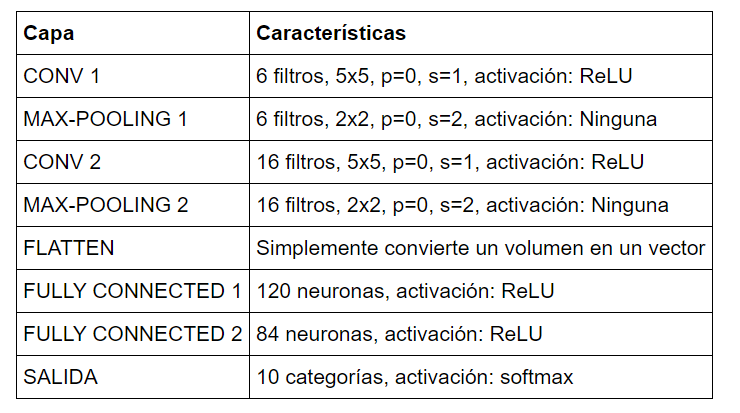



Creemos el contenedor del modelo usando Sequential():

In [11]:

modelo = Sequential()

Y añadimos, de forma secuencial, las diferentes capas de la red convolucional. En particular, usamos Conv2D para las capas convolucionales y MaxPooling2D para el max-pooling, junto con Flatten y Dense para la etapa de clasificación con redes neuronales y la capa de salida:

In [12]:
# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# CONV2 Y MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(84,activation='relu'))
modelo.add(Dense(nclases,activation='softmax'))

**3.4 - Compilación del modelo**

En esta etapa definimos el optimizador a usar (gradiente descendente, tasa de aprendizaje = 0.1), así como la función de error (entropía cruzada) y la métrica de desempeño (precisión):

In [13]:

sgd = SGD(lr=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

**3.5 - Entrenamiento**

Realicemos el entrenamiento usando 10 iteraciones, una tasa de aprendizaje de 0.1 y un tamaño de lote (batch_size) de 128:

In [14]:
nepochs = 10
tam_lote = 128 #En cada iteracion(epochs) pasamos 128 items del data set
modelo.fit(x_train,y_train,epochs=nepochs,batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.3716 - accuracy: 0.8842 - val_loss: 0.0908 - val_accuracy: 0.9718
Epoch 2/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0906 - accuracy: 0.9715 - val_loss: 0.0685 - val_accuracy: 0.9787
Epoch 3/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0650 - accuracy: 0.9797 - val_loss: 0.0599 - val_accuracy: 0.9804
Epoch 4/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0521 - accuracy: 0.9831 - val_loss: 0.0537 - val_accuracy: 0.9834
Epoch 5/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0443 - val_accuracy: 0.9861
Epoch 6/10
469/469 [==============================] - 23s 50ms/step - loss: 0.0359 - accuracy: 0.9881 - val_loss: 0.0422 - val_accuracy: 0.9870
Epoch 7/10
469/469 [==============================] - 24s 50ms/step - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0457 - val_accuracy:


Vemos que en la última iteración, el modelo alcanza una precisión de 99.3% para el set de entrenamiento y del 98.6% para el set de validación. Esta precisión nos indica que, en promedio, de cada 100 datos, aproximadamente 1 es clasificado incorrectamente. !Nada mal! DURACION DEL ENTRENAMIENTO SIN GPU, NI TPU :4min aprox

**4 - Desempeño del modelo**

La precisión obtenida anteriormente es una medida de desempeño global de la red convolucional, pero no nos permite verificar si algunos dígitos resultan mejor clasificados que otros. Para analizar en detalle este comportamiento, podemos usar la matriz de confusión:

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


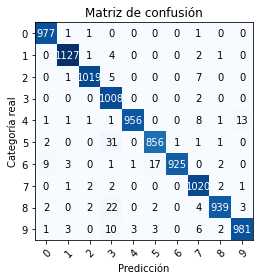

In [18]:
#Si estuviera alojado en otro archivo
#from matriz_confusion import graficar_matriz_de_confusion

y_pred = modelo.predict_classes(x_test)
y_ref = np.argmax(y_test,axis=1)
etiquetas = ['0','1','2','3','4','5','6','7','8','9']
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)